importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

reading the data

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape 

(32560, 15)

checking the shape of the dataset
per the observation there are 32560 rows and 15 coloumns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


check the info about data
per observation data is define in 2 datatypes i.e integer,object

(EDA)Exploratory Data Analysis

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

checking the null values
as per the above observation there are no null values

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

to check the unique values in dataset

 checking the value count of all the columns

In [8]:
for i in df.columns:
        print(i,"\n",df[i].value_counts())
        print('-----------------------------------')

Age 
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------
Workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------
Fnlwgt 
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------
Education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               

as per the above observation the columns Workclass,Occupation and Native_country having '? 'values.

Lets replace all '?' with most frequently occuring values of that column because these are categorical columns

In [9]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

checking duplicate values in dataset

In [11]:
df.duplicated().sum()

24

there are 24 duplicate values

let's drop duplicate data

In [12]:
df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


checking statistical point

In [13]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean is almost equal to the median for Age, Fnlwgt, Education_num, Hours_per_week and the mean has a variation with the median for Capital_gain, Capital_loss

EDA Conclusion:

1.There are 6 columns of datatype integer and all the others are of type object

2.The mean is almost equal to the median for Age, Fnlwgt, Education_num, Hours_per_week

3.The mean has a variation with the median for Capital_gain, Capital_loss

4.The dataset has no null values

5.We found " ? " in 3 columns and replaced it with the most frequent occuring value

6.Datset had 24 Duplicate values, hence we dropped them.


Data Visualization:

Grouping all categorical columns

In [14]:
cat_cols = [x for x in df.columns if df[x].dtypes=='O']

Grouping all numerical columns

In [15]:
num_cols = [y for y in df.columns if df[y].dtypes!='O']

Univariate Analysis

Lets plot the count of the individual features


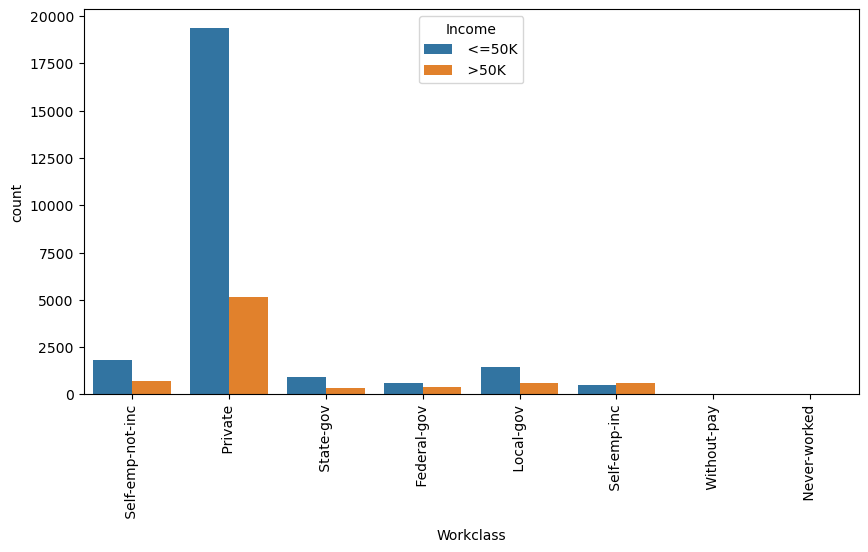

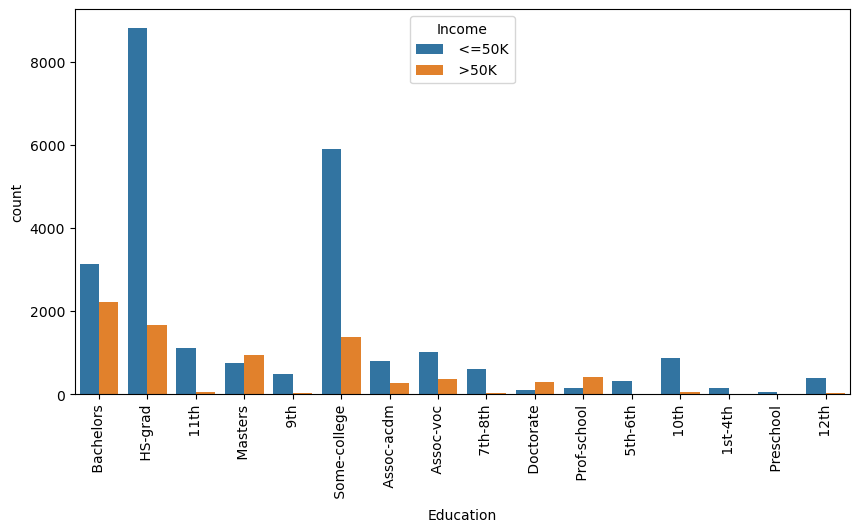

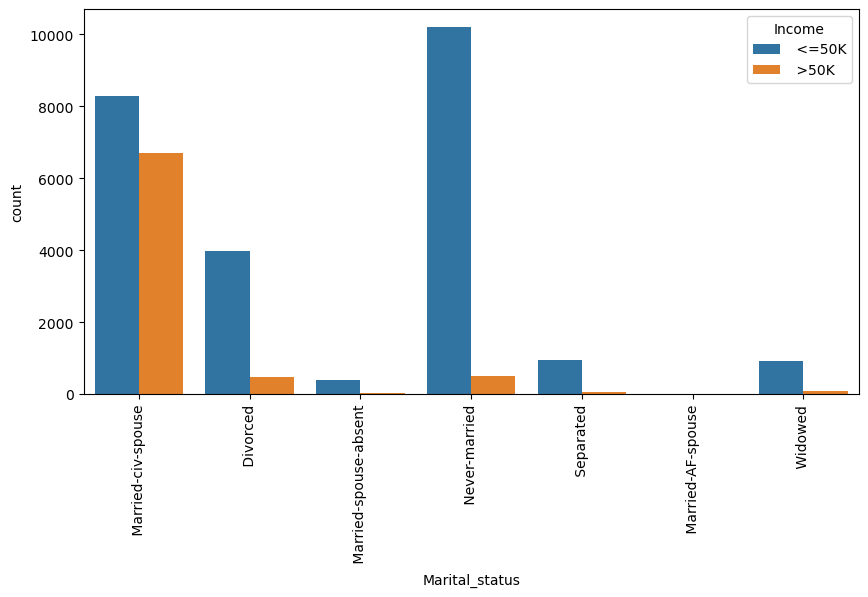

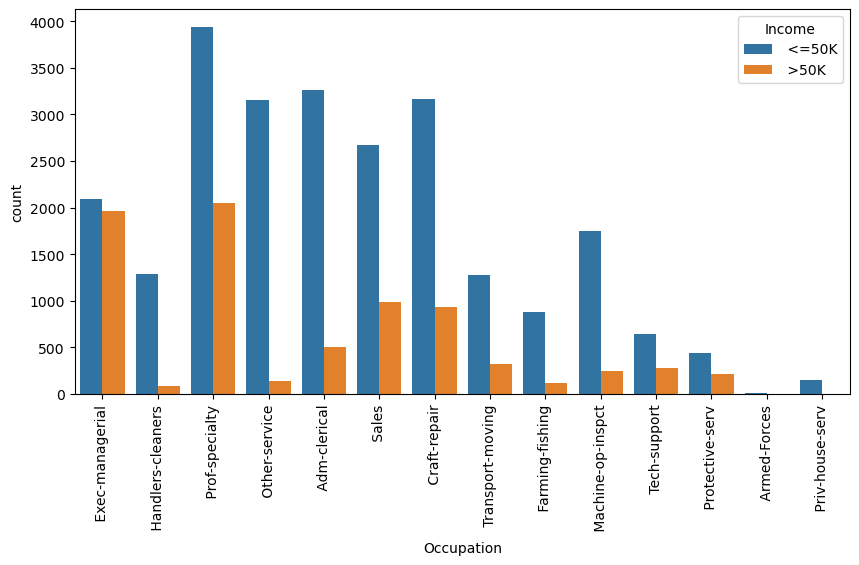

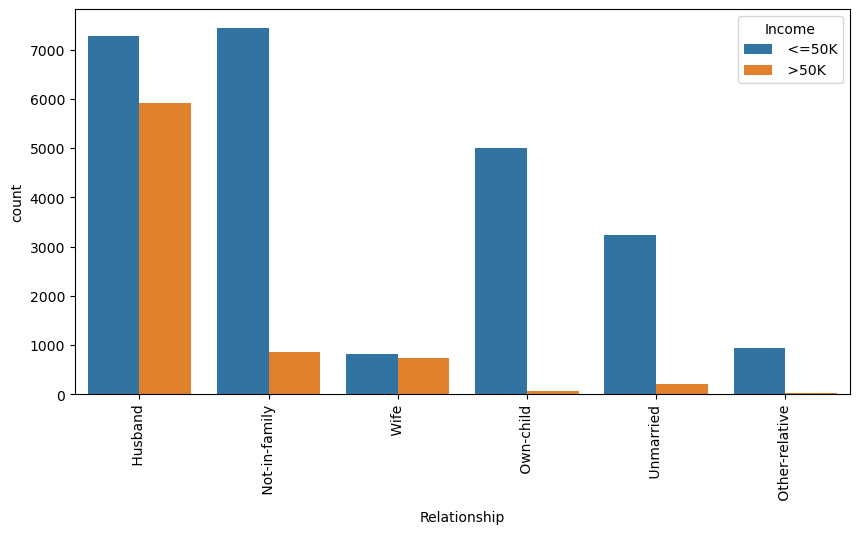

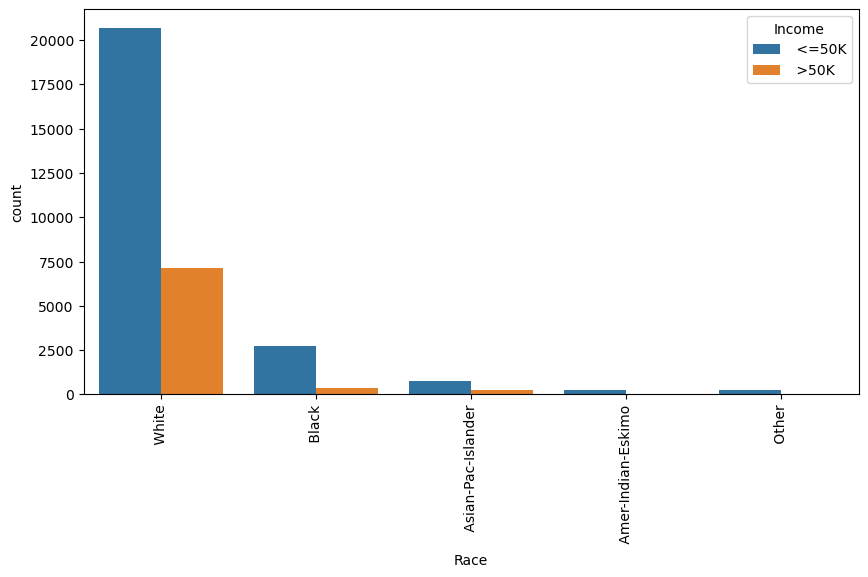

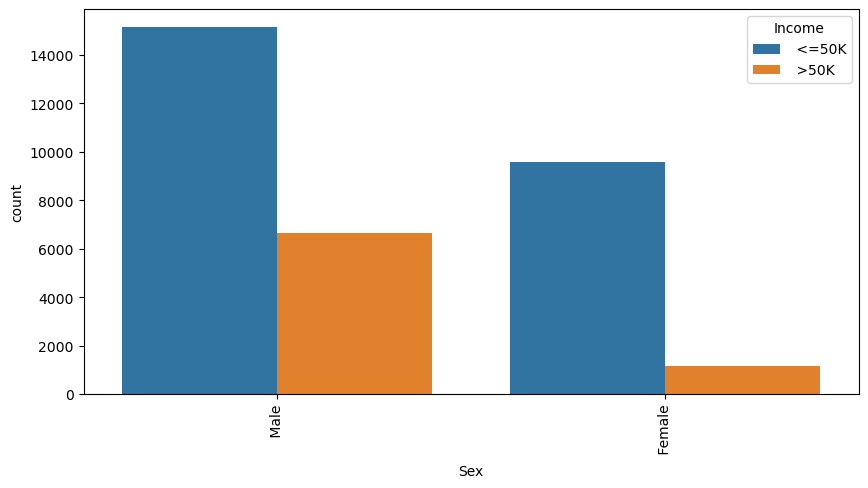

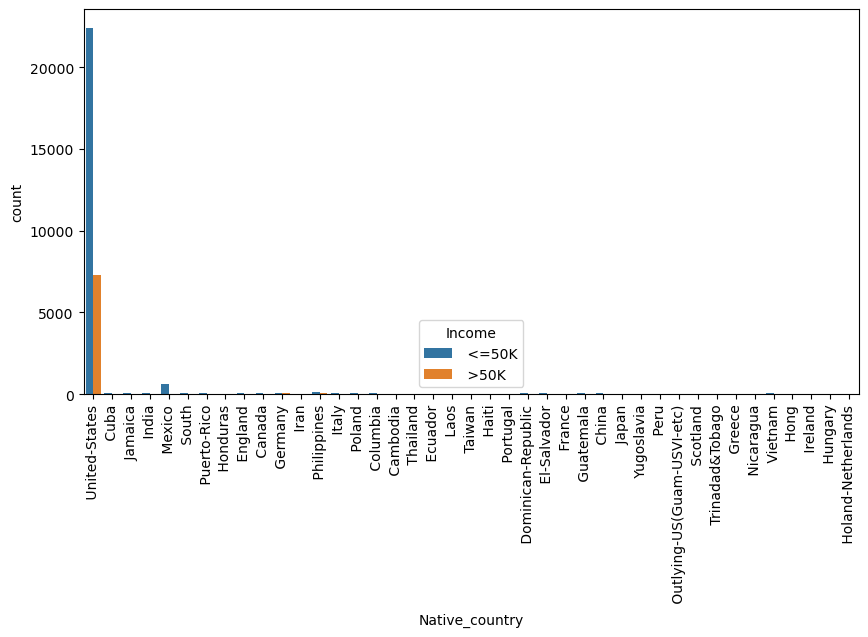

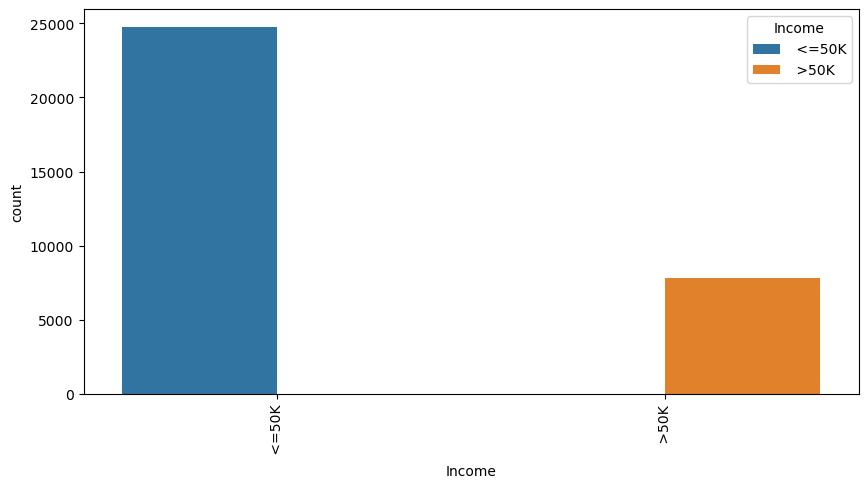

In [16]:
for i in df[cat_cols]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=df,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Conclusion:

1.The majority of the population works in the private workclass and has income <= 50k

2.There are very lessnumber of those who have never worked and did not work without pay

3.Most of the population earning <=50k is from some college and most people earning> = 50k have Bachelors in some fields

4.Most of the population who are married earn> = 50k and who earn <= 50k are never married

5.The vast majority of them who earn profit <= 50k are Admin-clerical,sales,Craft-repair and Transport depts

6.Since most of the US people are of the Race white, their incomes are higher than those of race Black.

7.Majority of the Males are earning either <=50k or >=50k compared to females

8.According to the graph, the majority of the population around 90% are from the United States


Lets plot distplot to check the distributions of each numerical category feature


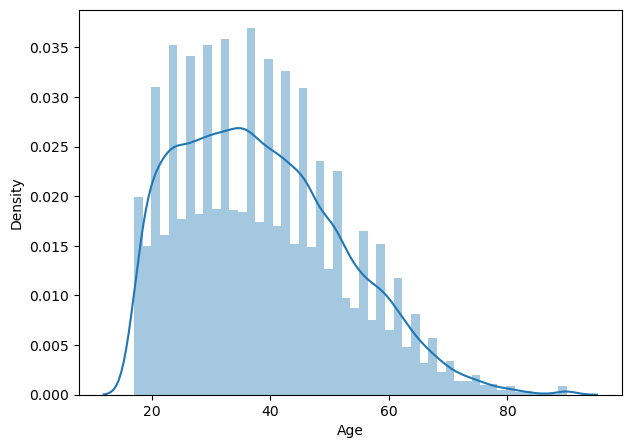

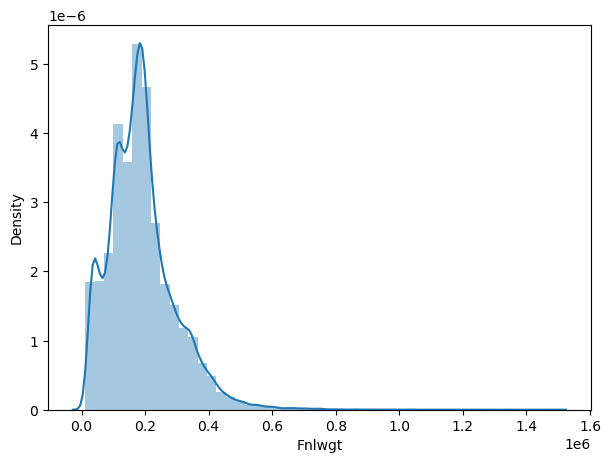

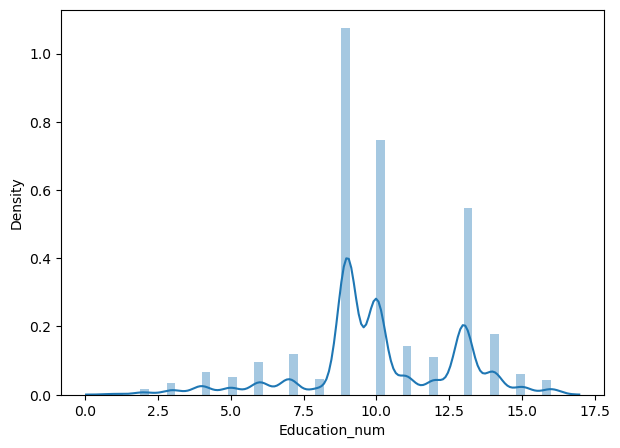

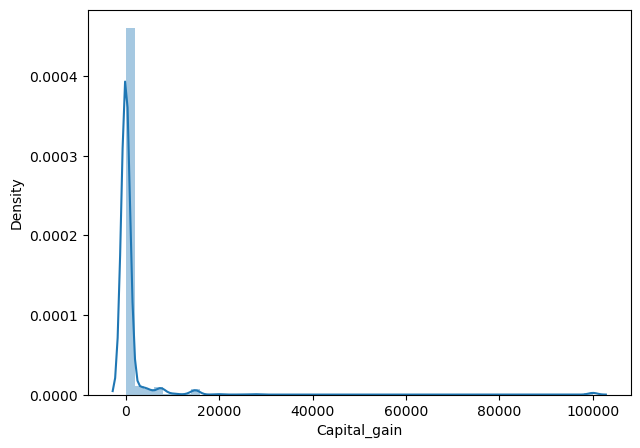

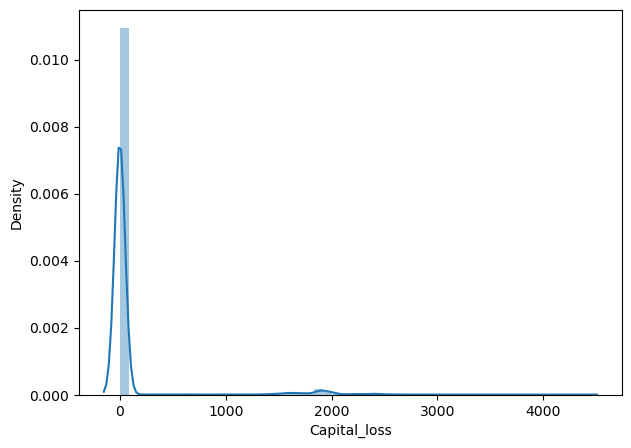

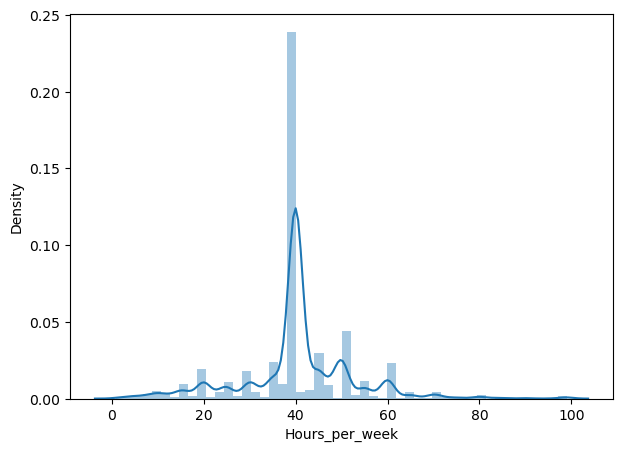

In [17]:
for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,kde=True)
    plt.show()

Conclution:
1.The above plot shows Capital Loss,Capital gain,Fnlwgt are right skewed

2.Age,Education_num,Hours_per_week are normally distributed

3.Most of the population works for about 40 hours per week.

Lets have a look on Workclass, how it is distributed

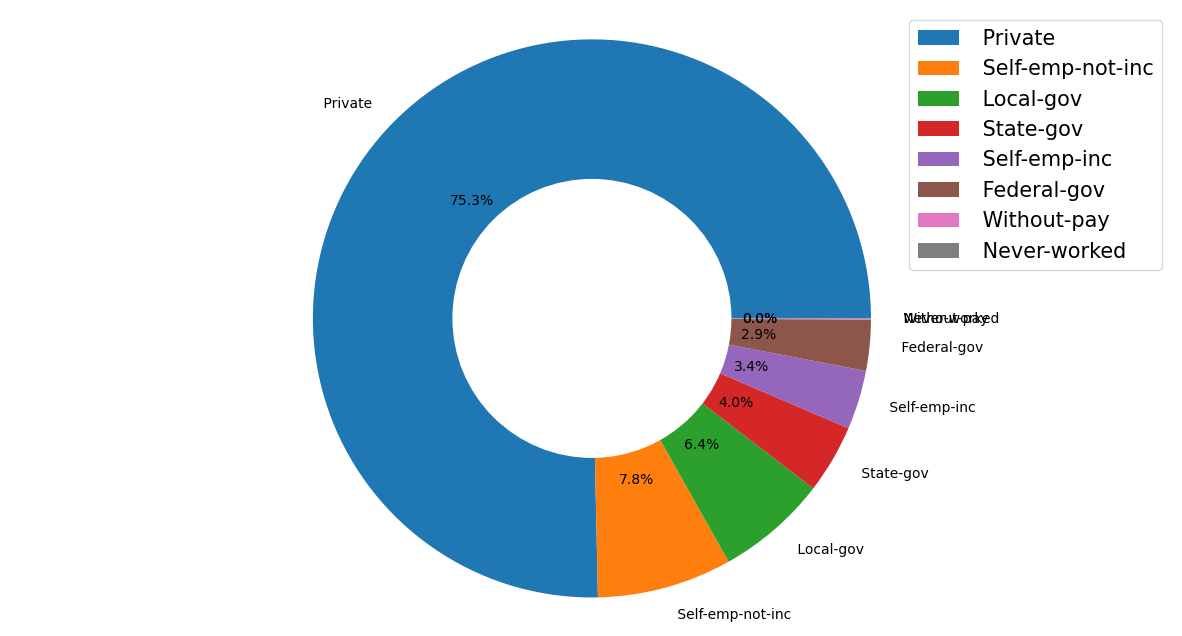

In [18]:
plt.figure(figsize=(15,8))
plt.pie( df["Workclass"].value_counts().values, labels = df["Workclass"].value_counts().index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

As per the above obseration about 75.3% of Workclass is private


Lets creating a pie chart to view  'Marital status'

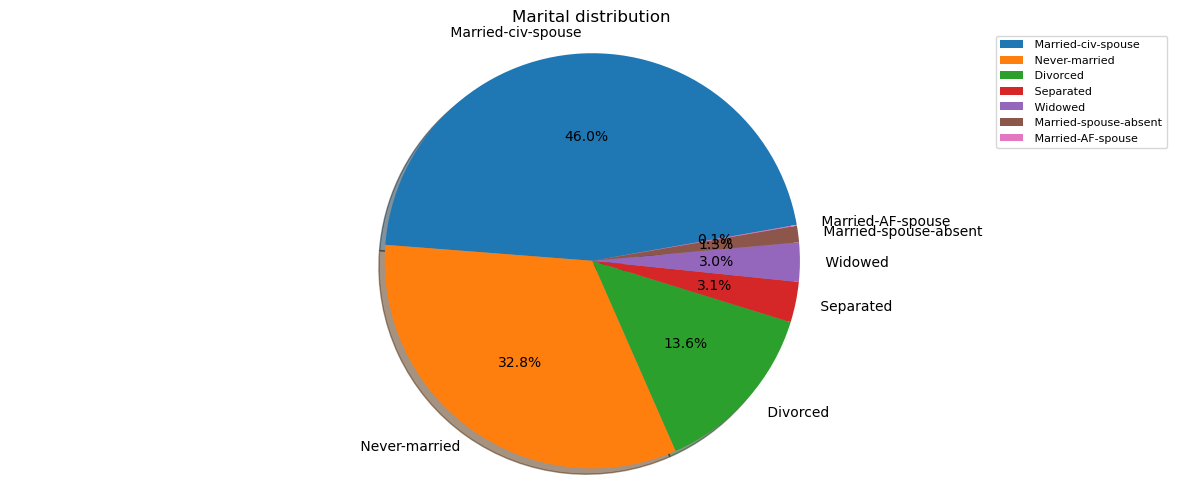

In [19]:
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(15,6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 8})
plt.axis('equal')
plt.show()

As per the above onservation about 92% of people belongs to Married_civ_spouse, Never_married and Divorced categories.
Only about 0.1% population belongs to Married_AF_spouse category

Multivariate Analysis:

Lets plot pairplot to check the relationship with multiple bivariate features

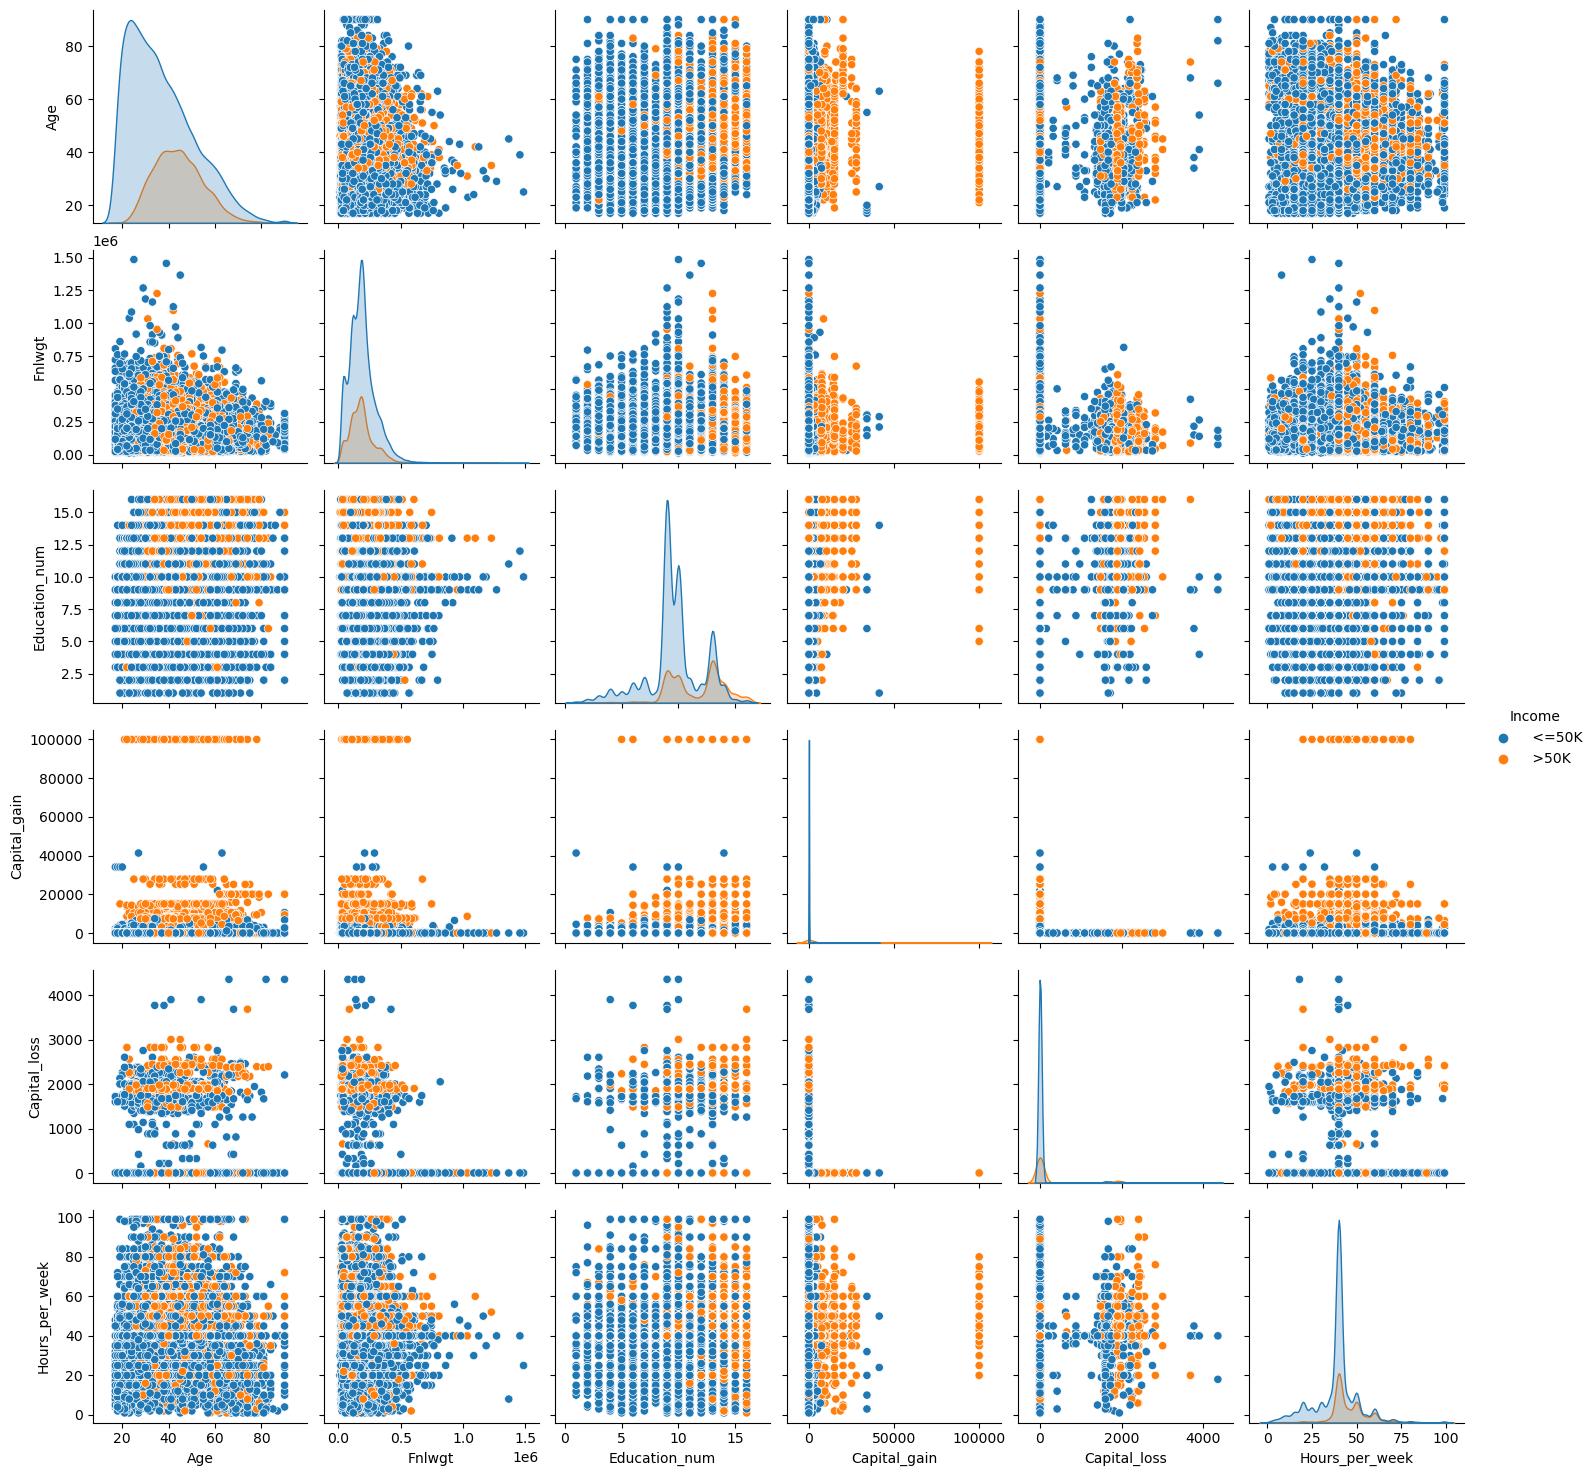

In [20]:
sns.pairplot(df,hue='Income')
plt.show()

Conclusion per the above plot:
1.Most of the population of all ages earn <= 50,000

2.Most of the entire educated population working 15 to 60 hours/week earn <=50k and fewer of them earn >=50k

3.Many who earn either <=50k or >=50k suffer a capital loss of 2000


Preprocessiong 

Lets check the entries in Capital_gain column

In [21]:
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

We will replace 0 in Capital_gain column with mean of this column

In [22]:
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace = True)

Checking the entries in Capital_loss column

In [23]:
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

Capital_loss column have 95.33% of entries that contains 0 so lets drop this column

In [24]:
df.drop(columns = "Capital_loss", inplace = True)

Lets replace Target column(Income) into binary codes to visualize heatmap

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

 Plotting heatmap to check correlation among differnt features and label

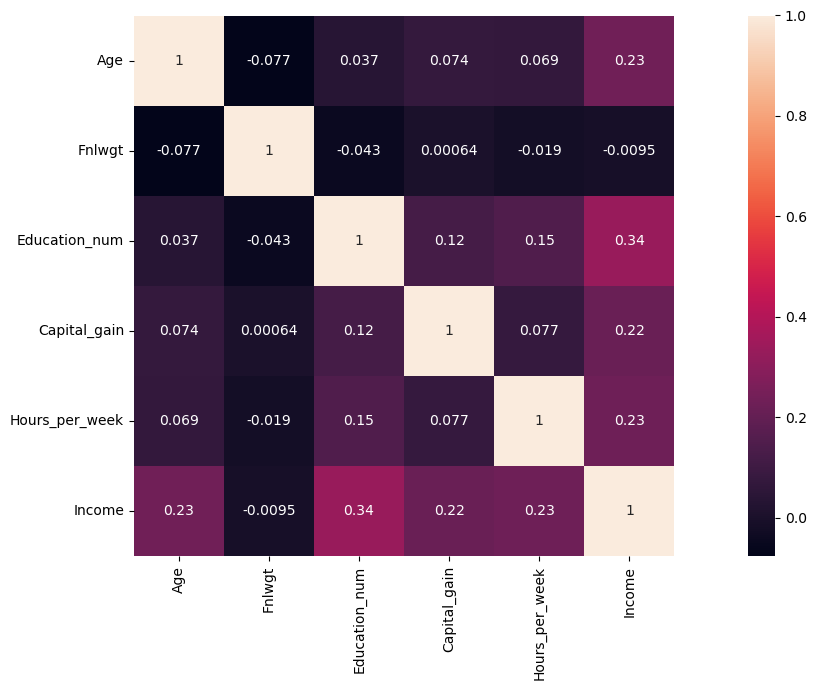

In [26]:
df_corr = df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, annot=True, square=True)
plt.tight_layout()

Observations:
    
1.The Flnwgt column has a much lower correlation coefficient with the target variable.

2.The rest all the features are also not strongly related to the target variable either,i.e. below 0.40.

3.Education_num is having a good relationship with the target variable compared to other resources.

Spliting the data into label and features

In [27]:
x = df.drop(columns = "Income")
y = df["Income"]

Label Encoder

Converting categorical data into numeric values, using label encoder

In [28]:
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

Checking for outliers

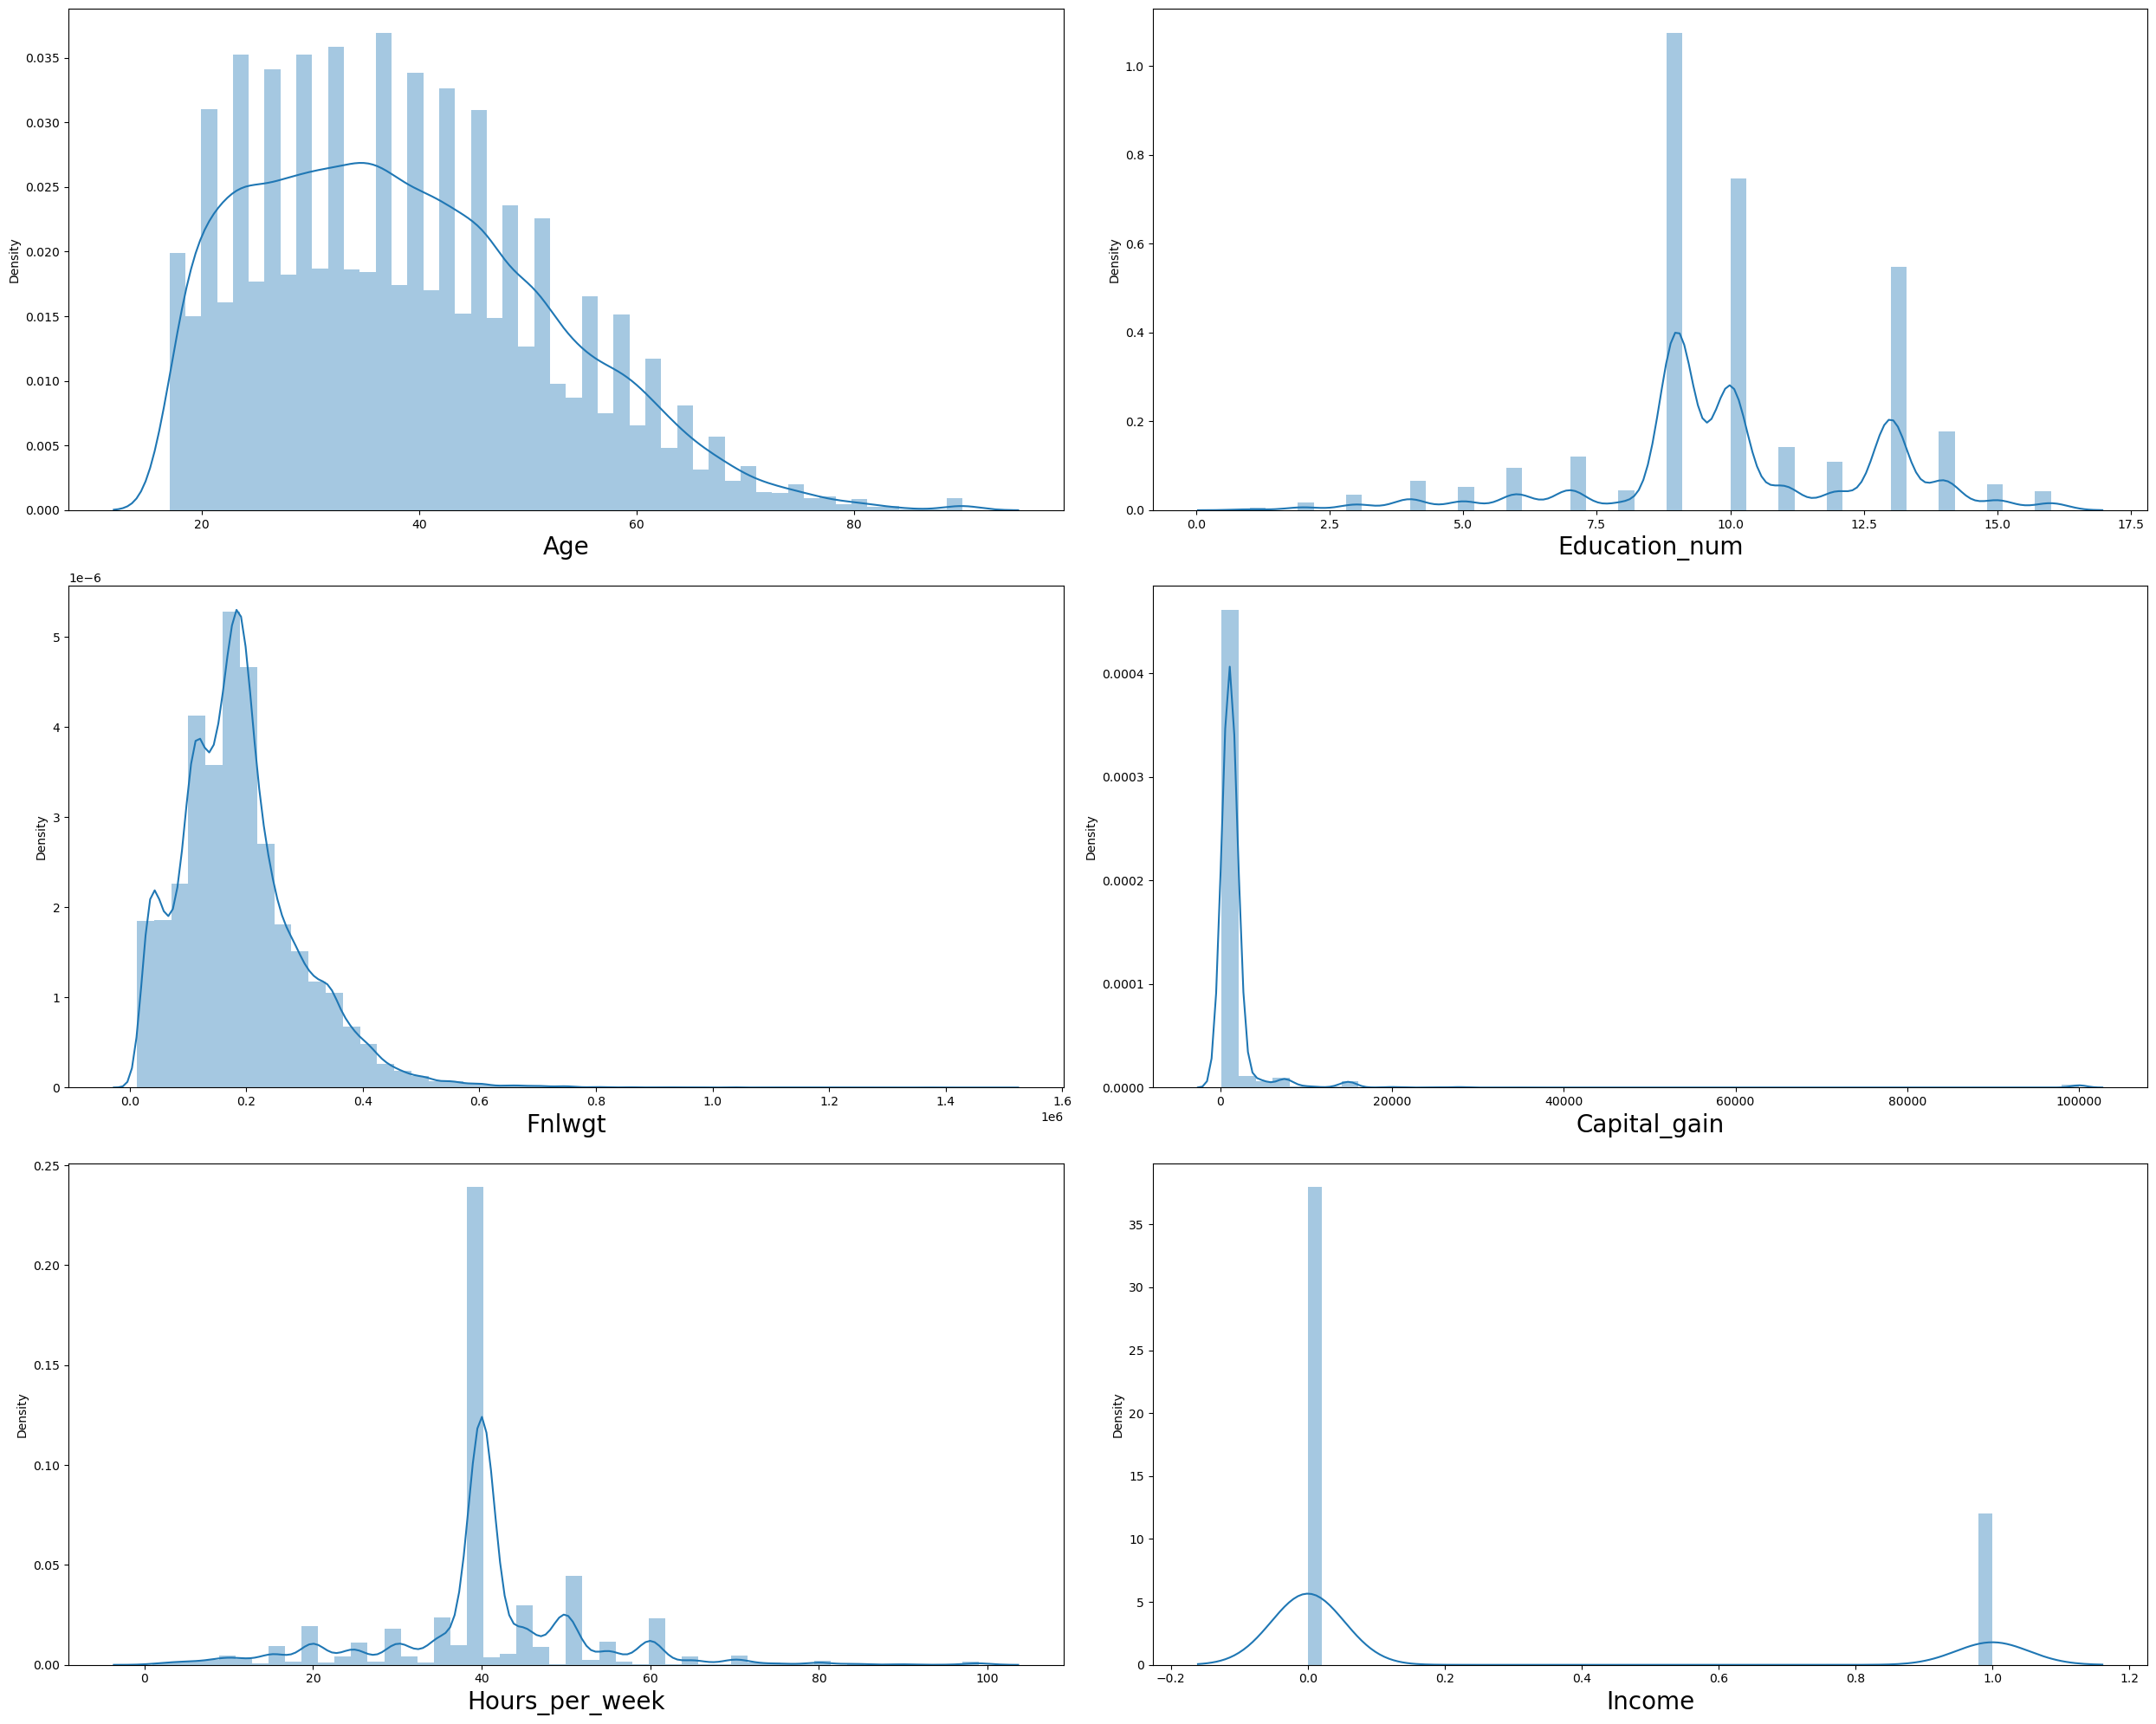

In [29]:
plt.figure(figsize = (25,20))
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Per above observation Outliers are presents in dataset.
We will have to remove them using zscore.

In [30]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,20,United-States,0


In [31]:
df.shape

(31255, 14)

4% data lost after applying Zscore technique.

Checking skewness of data

Dividing data into label and features

In [32]:
x = df.drop(columns = "Income")
y = df["Income"]

In [33]:
x.skew()

Age               0.476846
Fnlwgt            0.633372
Education_num    -0.165837
Capital_gain      5.449847
Hours_per_week   -0.348974
dtype: float64

Plotting histplot to find skewness

<Figure size 4000x2500 with 0 Axes>

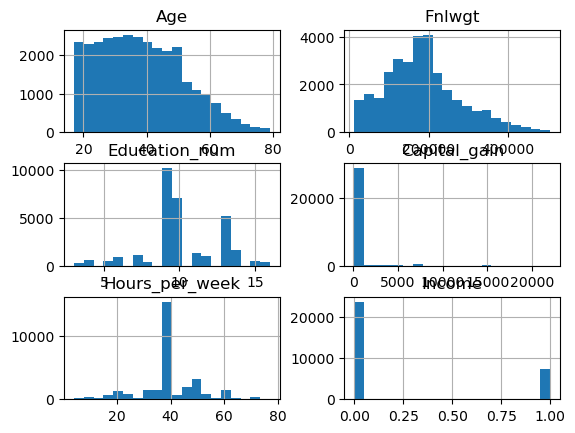

In [34]:
plt.figure(figsize=(40,25))
df.hist(bins=20)
plt.show()

Observation:
1.Majority of the population are of the age range 25-45

2.Fnlwgt is normally distributed and has negligable skewness

3.There is no skewness in capital gain

Removing Skewness

Lets use yeo-johnson Power transformation to remove skewness

In [35]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

x['Age'] = scaler.fit_transform(x['Age'].values.reshape(-1,1))
x['Fnlwgt'] = scaler.fit_transform(x['Fnlwgt'].values.reshape(-1,1))
x['Education_num'] = scaler.fit_transform(x['Education_num'].values.reshape(-1,1))
x['Capital_gain'] = scaler.fit_transform(x['Capital_gain'].values.reshape(-1,1))
x['Hours_per_week'] = scaler.fit_transform(x['Hours_per_week'].values.reshape(-1,1))
x.skew()

Age              -0.019081
Fnlwgt           -0.034702
Education_num     0.020849
Capital_gain      0.000000
Hours_per_week    0.108331
dtype: float64

In [ ]:
Converting categorical data into numeric values, using label encoder

In [36]:
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

Checking the label count

In [37]:
y.value_counts()

0    23848
1     7407
Name: Income, dtype: int64

Per the above observation the value count of our target variable is imbalanced  we will now oversample it by using smote

SMOTE:

In [38]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)
x_over

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country
0,0.919509,5,-1.114280,8,1.182842,2,3,0,4,1,0.0,-2.226409,38
1,0.114889,3,0.426743,10,-0.478822,0,5,1,4,1,0.0,-0.049144,38
2,1.096549,3,0.606905,1,-1.258079,2,5,0,2,1,0.0,-0.049144,38
3,-0.725378,3,1.487639,8,1.182842,2,9,5,2,0,0.0,-0.049144,4
4,0.039227,3,1.048681,11,1.616612,2,3,5,4,0,0.0,-0.049144,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,-0.420444,3,0.602440,13,-0.075365,2,11,0,4,1,0.0,0.029946,38
47692,0.137407,3,-0.597881,8,1.182842,2,6,0,4,1,0.0,0.949698,38
47693,0.827859,3,-1.792088,13,-0.075365,2,3,0,4,1,0.0,1.844006,38
47694,0.910471,6,-0.474637,9,2.503453,2,9,0,1,1,0.0,2.071740,38


Data Standardization:

Lets seperate numerical data

In [39]:
num_data = pd.DataFrame(x_over,columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'])

Bringing all numerical features to common scale by applying standard scaler

In [40]:
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)

cat_data = x_over.drop(columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'] )

Joining both categorical data and numerical data of our features

In [41]:
X = x_num.join(cat_data)
X

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.819580,-1.156245,0.943877,0.0,-2.465504,5,8,2,3,0,4,1,38
1,-0.056733,0.446626,-0.672407,0.0,-0.200350,3,10,0,5,1,4,1,38
2,1.012393,0.634018,-1.430383,0.0,-0.200350,3,1,2,5,0,2,1,38
3,-0.971867,1.550099,0.943877,0.0,-0.200350,3,8,2,9,5,2,0,4
4,-0.139135,1.093525,1.365801,0.0,-0.200350,3,11,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,-0.639763,0.629374,-0.279969,0.0,-0.118067,3,13,2,11,0,4,1,38
47692,-0.032208,-0.619121,0.943877,0.0,0.838812,3,8,2,6,0,4,1,38
47693,0.719764,-1.861257,-0.279969,0.0,1.769221,3,13,2,3,0,4,1,38
47694,0.809736,-0.490931,2.228422,0.0,2.006148,6,9,2,9,0,1,1,38


Building Model:

Using LogisticRegression

In [42]:
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7603991949010399 on Random State 69


Spliting data in 2 test and train data

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

Logistic Regression

Checking the model with LogisticRegression

In [44]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 76.039919490104%
roc_auc_score: 76.02430980647716%
---------------------------------------------------
Confusion Matrix : 
 [[4367 1554]
 [1303 4700]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      5921
           1       0.75      0.78      0.77      6003

    accuracy                           0.76     11924
   macro avg       0.76      0.76      0.76     11924
weighted avg       0.76      0.76      0.76     11924



Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")


Accuracy Score: 87.88996980878899%
roc_auc_score: 87.87382472699923%
---------------------------------------------------
Confusion Matrix : 
 [[5064  857]
 [ 587 5416]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      5921
           1       0.86      0.90      0.88      6003

    accuracy                           0.88     11924
   macro avg       0.88      0.88      0.88     11924
weighted avg       0.88      0.88      0.88     11924

